In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import and Clean
df = pd.read_csv("/content/lions_2024_season.csv")
df = df.rename(columns={'Unnamed: 5_level_1':'Result', 'Opp.1': 'Opp', 'Unnamed: 3_level_1': 'Time',
                        'Unnamed: 8_level_1': 'Site'})
df = df.rename(columns=lambda col: col.replace('.1', '_def') if '.1' in col else col)
pd.set_option('display.max_columns', None)
df.head()

,Week,Day,Date,Time,Unnamed: 4_level_1,Result,OT,Rec,Site,Opp,Tm,Opp,1stD,TotYd,PassY,RushY,TO,1stD_def,TotYd_def,PassY_def,RushY_def,TO_def,Offense,Defense,Sp. Tms
0,1,Sun,September 8,8:20PM ET,boxscore,W,OT,1-0,NaN,Los Angeles Rams,26.0,20.0,21.0,363.0,200.0,163.0,1.0,26.0,387.0,304.0,83.0,1.0,9.52,-8.78,3.90
1,2,Sun,September 15,1:00PM ET,boxscore,L,NaN,1-1,NaN,Tampa Bay Buccaneers,16.0,20.0,26.0,463.0,324.0,139.0,2.0,14.0,216.0,146.0,70.0,1.0,3.18,-0.10,-4.12
2,3,Sun,September 22,4:25PM ET,boxscore,W,NaN,2-1,@,Arizona Cardinals,20.0,13.0,23.0,373.0,186.0,187.0,1.0,17.0,277.0,200.0,77.0,1.0,5.52,5.25,-2.55
3,4,Mon,September 30,8:15PM ET,boxscore,W,NaN,3-1,NaN,Seattle Seahawks,42.0,29.0,21.0,389.0,273.0,116.0,NaN,38.0,516.0,383.0,133.0,2.0,24.24,-15.58,1.69
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Site'] = df['Site'].fillna('H')
df['Site'] = df['Site'].replace('@', 'A')
df.head()

,Week,Day,Date,Time,Unnamed: 4_level_1,Result,OT,Rec,Site,Opp,Tm,Opp,1stD,TotYd,PassY,RushY,TO,1stD_def,TotYd_def,PassY_def,RushY_def,TO_def,Offense,Defense,Sp. Tms
0,1,Sun,September 8,8:20PM ET,boxscore,W,OT,1-0,H,Los Angeles Rams,26.0,20.0,21.0,363.0,200.0,163.0,1.0,26.0,387.0,304.0,83.0,1.0,9.52,-8.78,3.90
1,2,Sun,September 15,1:00PM ET,boxscore,L,NaN,1-1,H,Tampa Bay Buccaneers,16.0,20.0,26.0,463.0,324.0,139.0,2.0,14.0,216.0,146.0,70.0,1.0,3.18,-0.10,-4.12
2,3,Sun,September 22,4:25PM ET,boxscore,W,NaN,2-1,A,Arizona Cardinals,20.0,13.0,23.0,373.0,186.0,187.0,1.0,17.0,277.0,200.0,77.0,1.0,5.52,5.25,-2.55
3,4,Mon,September 30,8:15PM ET,boxscore,W,NaN,3-1,H,Seattle Seahawks,42.0,29.0,21.0,389.0,273.0,116.0,NaN,38.0,516.0,383.0,133.0,2.0,24.24,-15.58,1.69
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,Bye Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Aggregation

# Group by results and count how many there are
df.groupby('Result')['Result'].count()

,Result
Result,
L,3
W,15


In [ ]:
# How good was our offense in wins and losses?
df.groupby('Result').agg({
    'PassY': 'mean',
    'RushY': 'mean',
    'TO': 'sum'
})

,PassY,RushY,TO
Result,,,
L,372.333333,129.333333,8.0
W,245.133333,153.400000,12.0


In [ ]:
# What about the defense?
df.groupby('Result').agg({
    'PassY_def': 'mean',
    'RushY_def': 'mean',
    'TO_def': 'sum'
})

# Only 1 forced turnover in losses...

,PassY_def,RushY_def,TO_def
Result,,,
L,269.000000,149.666667,1.0
W,242.666667,93.666667,23.0


In [ ]:
# What's the pass yard distribution in home and away games?
df.groupby('Site')['PassY'].agg({
    'mean',
    'median',
    'std'
})

,std,mean,median
Site,,,
A,63.17309,248.375,250.0
H,121.38465,280.700,276.5


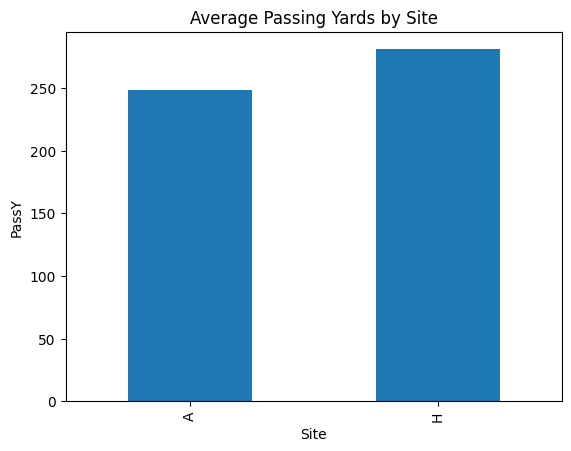

In [ ]:
# Let's plot it
df.groupby('Site')['PassY'].mean().plot(kind='bar')
plt.title('Average Passing Yards by Site')
plt.xlabel('Site')
plt.ylabel('PassY')
plt.show()

In [ ]:
# Let's group by more than one column!
df.groupby(['Result', 'Site']).agg({
    'PassY': 'mean',
    'RushY': 'mean',
    'TO': 'sum',
    'PassY_def': 'mean',
    'RushY_def': 'mean',
    'TO_def': 'sum'
})

# We only ever lost at home? Road warriors.
# Our best rushing attack was in home wins and our best defense was played in away wins

PassY       RushY   TO  PassY_def   RushY_def  TO_def
Result Site                                                            
L      H     372.333333  129.333333  8.0     269.00  149.666667     1.0
W      A     248.375000  147.375000  7.0     250.25   86.625000    14.0
       H     241.428571  160.285714  5.0     234.00  101.714286     9.0

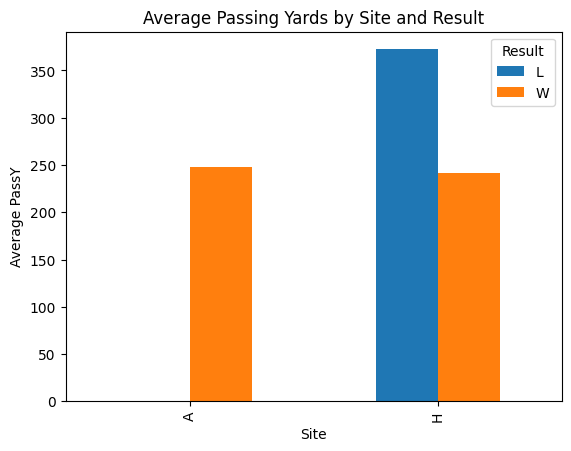

In [ ]:
# Here's a more advanced plot
df.groupby(['Site', 'Result'])['PassY'].mean().unstack().plot(kind='bar')

plt.title('Average Passing Yards by Site and Result')
plt.xlabel('Site')
plt.ylabel('Average PassY')
plt.legend(title='Result')
plt.show()

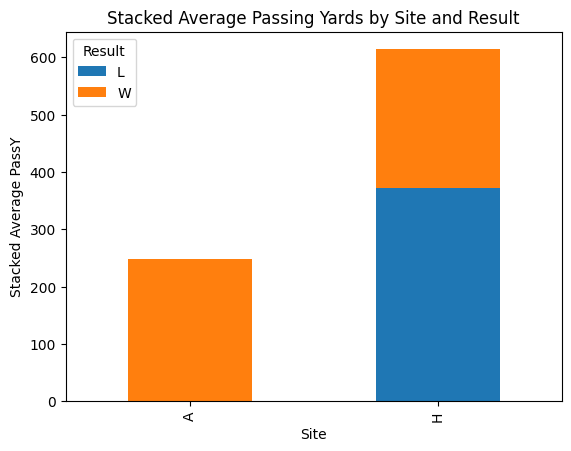

In [ ]:
# Or stacked
df.groupby(['Site', 'Result'])['PassY'].mean().unstack().plot(kind='bar', stacked=True)

plt.title('Stacked Average Passing Yards by Site and Result')
plt.xlabel('Site')
plt.ylabel('Stacked Average PassY')
plt.legend(title='Result')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
# Correlations

# drop the bye week and extra header row
dropped = df.drop([4, 18], axis=0)
dropped.head(20)

,Week,Day,Date,Time,Unnamed: 4_level_1,Result,OT,Rec,Site,Opp,Tm,Opp,1stD,TotYd,PassY,RushY,TO,1stD_def,TotYd_def,PassY_def,RushY_def,TO_def,Offense,Defense,Sp. Tms
0,1,Sun,September 8,8:20PM ET,boxscore,W,OT,1-0,H,Los Angeles Rams,26.0,20.0,21.0,363.0,200.0,163.0,1.0,26.0,387.0,304.0,83.0,1.0,9.52,-8.78,3.90
1,2,Sun,September 15,1:00PM ET,boxscore,L,NaN,1-1,H,Tampa Bay Buccaneers,16.0,20.0,26.0,463.0,324.0,139.0,2.0,14.0,216.0,146.0,70.0,1.0,3.18,-0.10,-4.12
2,3,Sun,September 22,4:25PM ET,boxscore,W,NaN,2-1,A,Arizona Cardinals,20.0,13.0,23.0,373.0,186.0,187.0,1.0,17.0,277.0,200.0,77.0,1.0,5.52,5.25,-2.55
3,4,Mon,September 30,8:15PM ET,boxscore,W,NaN,3-1,H,Seattle Seahawks,42.0,29.0,21.0,389.0,273.0,116.0,NaN,38.0,516.0,383.0,133.0,2.0,24.24,-15.58,1.69
5,6,Sun,October 13,4:25PM ET,boxscore,W,NaN,4-1,A,Dallas Cowboys,47.0,9.0,27.0,492.0,308.0,184.0,NaN,16.0,251.0,198.0,53.0,5.0,24.40,24.28,-9.24
6,7,Sun,October 20,1:00PM ET,boxscore,W,NaN,5-1,A,Minnesota Vikings,31.0,29.0,19.0,391.0,247.0,144.0,1.0,16.0,383.0,244.0,139.0,1.0,6.31,-5.48,0.54
7,8,Sun,October 27,1:00PM ET,boxscore,W,NaN,6-1,H,Tennessee Titans,52.0,14.0,17.0,225.0,61.0,164.0,NaN,23.0,416.0,258.0,158.0,4.0,11.03,10.20,14.05
8,9,Sun,November 3,4:25PM ET,boxscore,W,NaN,7-1,A,Green Bay Packers,24.0,14.0,17.0,261.0,137.0,124.0,NaN,20.0,411.0,273.0,138.0,1.0,6.20,-3.70,6.04
9,10,Sun,November 10,8:20PM ET,boxscore,W,NaN,8-1,A,Houston Texans,26.0,23.0,19.0,345.0,240.0,105.0,5.0,16.0,248.0,192.0,56.0,2.0,-4.41,8.28,-1.87
10,11,Sun,November 17,1:00PM ET,boxscore,W,NaN,9-1,H,Jacksonville Jaguars,52.0,6.0,38.0,645.0,449.0,196.0,NaN,10.0,170.0,129.0,41.0,1.0,48.70,11.69,-11.65


In [ ]:
# One hot encode result and site because corr() takes only numeric columns
dropped = pd.get_dummies(dropped, columns=['Result', 'Site'])
dropped.head()

,Week,Day,Date,Time,Unnamed: 4_level_1,OT,Rec,Opp,Tm,Opp,1stD,TotYd,PassY,RushY,TO,1stD_def,TotYd_def,PassY_def,RushY_def,TO_def,Offense,Defense,Sp. Tms,Result_L,Result_W,Site_A,Site_H
0,1,Sun,September 8,8:20PM ET,boxscore,OT,1-0,Los Angeles Rams,26.0,20.0,21.0,363.0,200.0,163.0,1.0,26.0,387.0,304.0,83.0,1.0,9.52,-8.78,3.90,False,True,False,True
1,2,Sun,September 15,1:00PM ET,boxscore,NaN,1-1,Tampa Bay Buccaneers,16.0,20.0,26.0,463.0,324.0,139.0,2.0,14.0,216.0,146.0,70.0,1.0,3.18,-0.10,-4.12,True,False,False,True
2,3,Sun,September 22,4:25PM ET,boxscore,NaN,2-1,Arizona Cardinals,20.0,13.0,23.0,373.0,186.0,187.0,1.0,17.0,277.0,200.0,77.0,1.0,5.52,5.25,-2.55,False,True,True,False
3,4,Mon,September 30,8:15PM ET,boxscore,NaN,3-1,Seattle Seahawks,42.0,29.0,21.0,389.0,273.0,116.0,NaN,38.0,516.0,383.0,133.0,2.0,24.24,-15.58,1.69,False,True,False,True
5,6,Sun,October 13,4:25PM ET,boxscore,NaN,4-1,Dallas Cowboys,47.0,9.0,27.0,492.0,308.0,184.0,NaN,16.0,251.0,198.0,53.0,5.0,24.40,24.28,-9.24,False,True,True,False


In [ ]:
dropped.corr(numeric_only=True)

,Tm,Opp,1stD,TotYd,PassY,RushY,TO,1stD_def,TotYd_def,PassY_def,RushY_def,TO_def,Offense,Defense,Sp. Tms,Result_L,Result_W,Site_A,Site_H
Tm,1.000000,0.047422,0.280203,0.278612,0.270902,0.008139,-0.045644,0.263243,0.240224,0.245266,0.135914,0.607603,0.735131,0.043108,0.011155,-0.145203,0.145203,-0.197571,0.197571
Opp,0.047422,1.000000,0.056862,0.180847,0.359614,-0.453987,0.230219,0.648266,0.729965,0.647923,0.590128,-0.281191,0.001265,-0.901993,0.177091,0.599211,-0.599211,-0.250186,0.250186
1stD,0.280203,0.056862,1.000000,0.923193,0.831716,0.191736,0.033974,-0.255458,-0.253792,-0.233554,-0.190098,-0.103413,0.715865,-0.071555,-0.704667,0.370138,-0.370138,-0.319000,0.319000
TotYd,0.278612,0.180847,0.923193,1.000000,0.918774,0.163049,0.166121,-0.129242,-0.150328,-0.080136,-0.218493,-0.093925,0.709759,-0.155526,-0.747222,0.407735,-0.407735,-0.189503,0.189503
PassY,0.270902,0.359614,0.831716,0.918774,1.000000,-0.239695,0.065696,-0.009091,0.014603,0.062811,-0.078883,-0.178934,0.657654,-0.314485,-0.693513,0.494843,-0.494843,-0.167671,0.167671
RushY,0.008139,-0.453987,0.191736,0.163049,-0.239695,1.000000,0.100307,-0.295112,-0.406182,-0.354041,-0.340177,0.248282,0.101868,0.403475,-0.104377,-0.233985,0.233985,-0.046991,0.046991
TO,-0.045644,0.230219,0.033974,0.166121,0.065696,0.100307,1.000000,0.098725,-0.011126,-0.056153,0.057516,0.968330,-0.377532,-0.000736,0.117908,0.281718,-0.281718,0.140859,-0.140859
1stD_def,0.263243,0.648266,-0.255458,-0.129242,-0.009091,-0.295112,0.098725,1.000000,0.885946,0.901407,0.506949,0.124823,0.129564,-0.706283,0.471279,0.197669,-0.197669,-0.240027,0.240027
TotYd_def,0.240224,0.729965,-0.253792,-0.150328,0.014603,-0.406182,-0.011126,0.885946,1.000000,0.927955,0.735030,0.077178,0.098286,-0.793121,0.540990,0.283373,-0.283373,-0.108875,0.108875
PassY_def,0.245266,0.647923,-0.233554,-0.080136,0.062811,-0.354041,-0.056153,0.901407,0.927955,1.000000,0.429378,0.088411,0.197200,-0.761025,0.478085,0.120721,-0.120721,0.035147,-0.035147


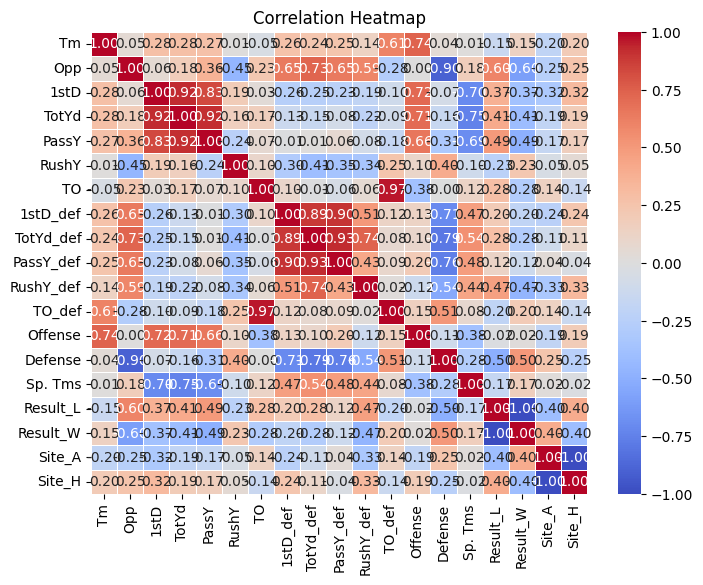

In [ ]:
# That's not very easy to understand, but it's nice to have exact numbers
# Let's do a more visual way

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(dropped.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

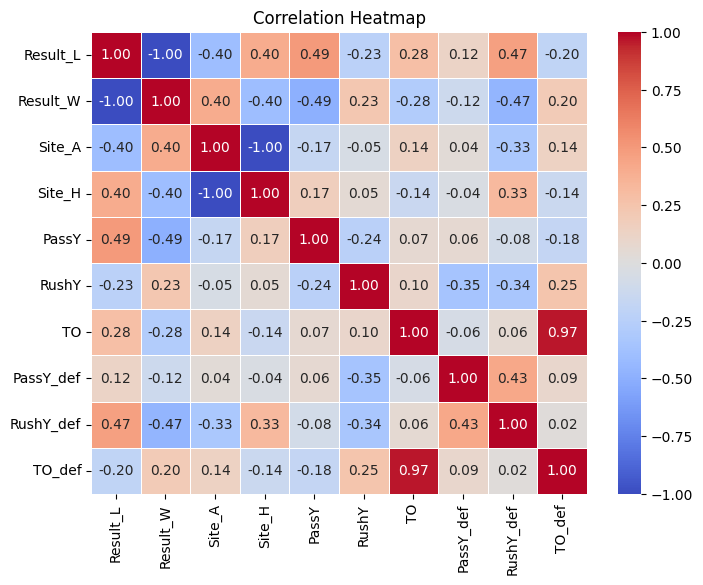

In [ ]:
# Too much going on! Let's take a subset that we care about
subset = dropped[['Result_L', 'Result_W', 'Site_A', 'Site_H', 'PassY', 'RushY', 'TO', 'PassY_def', 'RushY_def', 'TO_def']]
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# The heatmap can be extremely useful for model creation,
# as you can focus on stronger positive/negative correlations

In [ ]:
# Here's some additional examples of more advanced graphs for reference

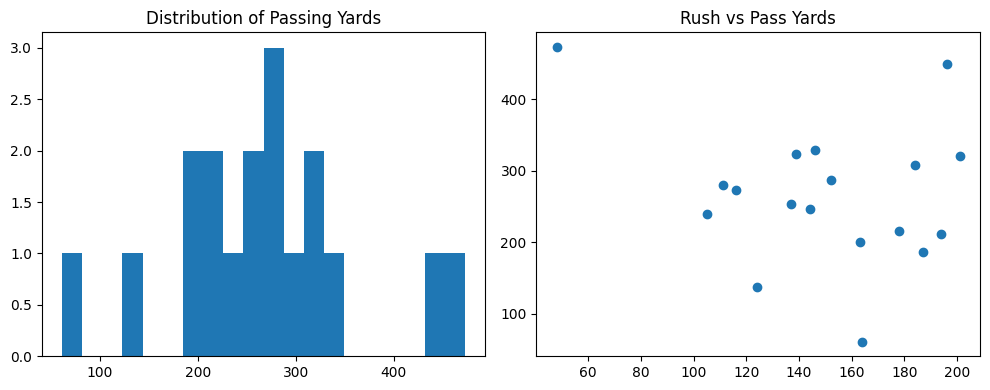

In [ ]:
# Subplots

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df['PassY'], bins=20)
axes[0].set_title('Distribution of Passing Yards')

axes[1].scatter(df['RushY'], df['PassY'])
axes[1].set_title('Rush vs Pass Yards')

plt.tight_layout()
plt.show()

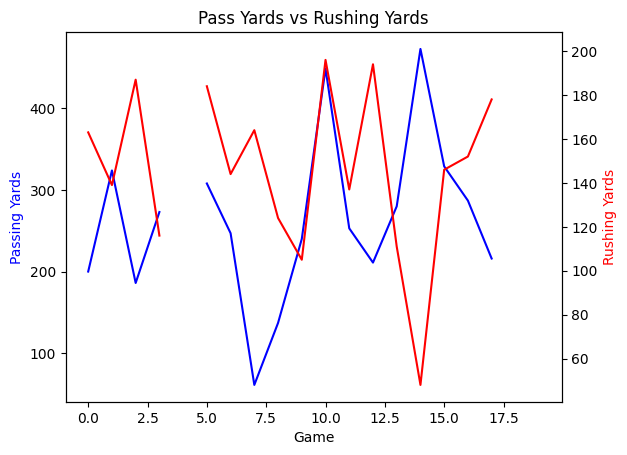

In [ ]:
# Multiple y axes

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # second y-axis
ax1.plot(df['PassY'], color='blue', label='PassY')
ax2.plot(df['RushY'], color='red', label='RushY')

ax1.set_xlabel('Game')
ax1.set_ylabel('Passing Yards', color='blue')
ax2.set_ylabel('Rushing Yards', color='red')
plt.title('Pass Yards vs Rushing Yards')
plt.show()

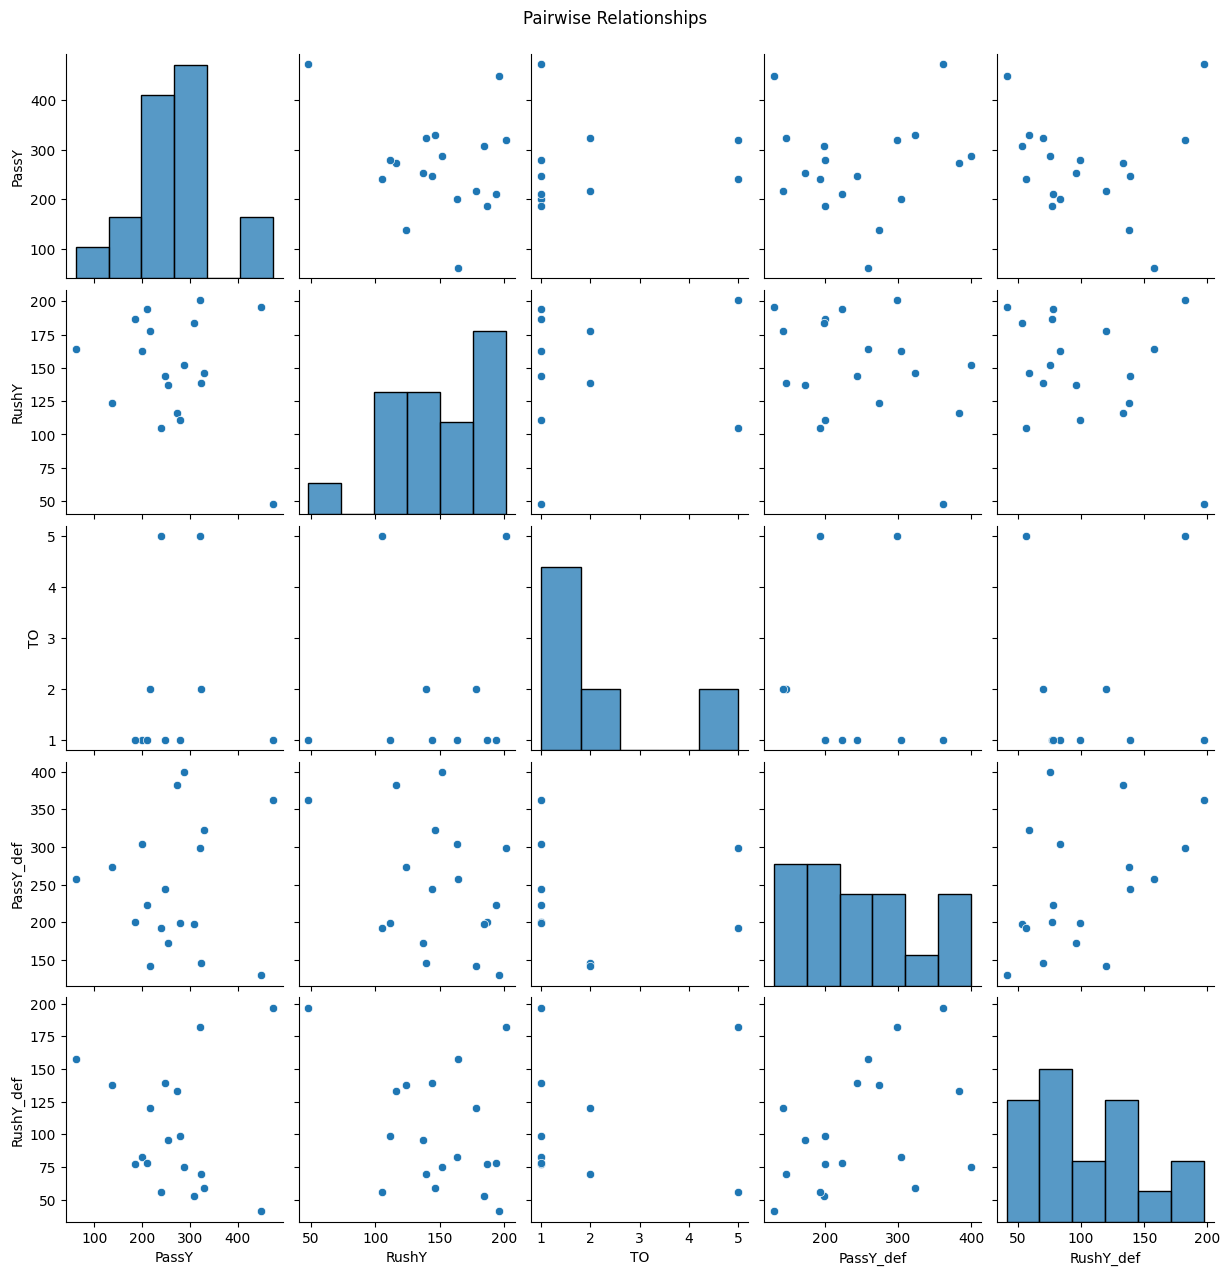

In [ ]:
# Seaborn pairplot -- visualizes pairwise relationships

sns.pairplot(df[['PassY', 'RushY', 'TO', 'PassY_def', 'RushY_def']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

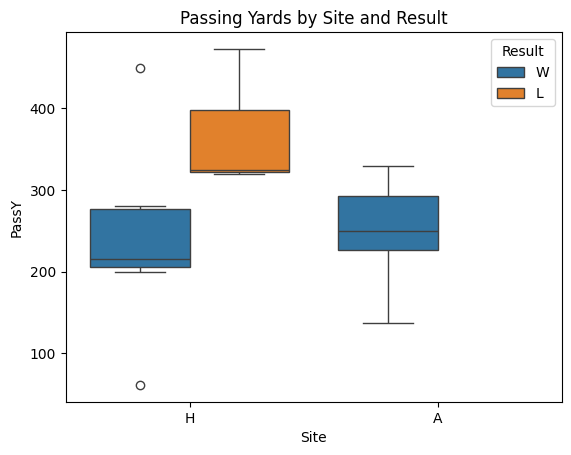

In [ ]:
# Boxplot with multiple categories

sns.boxplot(data=df, x='Site', y='PassY', hue='Result')
plt.title('Passing Yards by Site and Result')
plt.show()

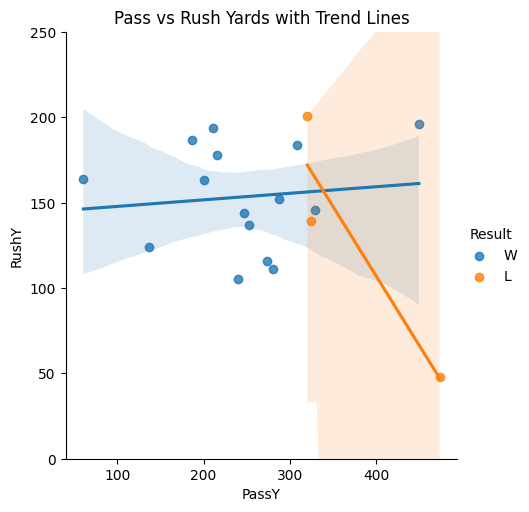

In [ ]:
# Regression Line plot -- could be useful after making a model...

sns.lmplot(data=df, x='PassY', y='RushY', hue='Result', height=5)
plt.ylim(0, 250) # set the y axis range
plt.title('Pass vs Rush Yards with Trend Lines')
plt.show()